### <center> Иследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма Random Forest

In [10]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
plt.style.use('ggplot')

### Считываем данные из файла, пустые значения заменяем на медианные

In [3]:
df=pd.read_csv(r"C:\Users\Rasim\Desktop\DataAnalysis\DataSets\ORGANICS.csv",encoding="cp1251")
print(df.shape) 
print(df.info())
df.fillna(df.median(axis=0), axis=0, inplace=True) 
df

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [11]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11].astype('float64')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
tree_nums = [i for i in range(1, 302, 10)]
df = pd.DataFrame(columns=['trees_num', 'score'])
for tree_num in tree_nums:
    forest = RandomForestClassifier(n_estimators=tree_num, n_jobs=-1)
    forest.fit(X_train, y_train)
    forest.score(X_test, y_test)
    df = df.append({'trees_num': tree_num, 'score': forest.score(X_test, y_test)}, ignore_index=True)
df
 

,trees_num,score
0,1.0,0.723564
1,11.0,0.772611
2,21.0,0.785961
3,31.0,0.781311
4,41.0,0.783711
5,51.0,0.782811
6,61.0,0.789411
7,71.0,0.785811
8,81.0,0.789111
9,91.0,0.789111


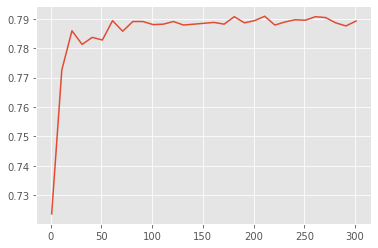

In [24]:
plt.plot(df['trees_num'], df['score'])